In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
data = pd.read_csv('imgs/log.csv')
try:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [float(si) for si in s.split(":")])
except:
    data["FlatWeights"] = data["FlatWeights"].apply(lambda s: [0])
data.head()

,Generation,BestEval,FlatWeights
0,1,0.194973,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,100,0.407726,"[0.0, 0.0024, 0.0, 0.0, 0.0, -0.0022, 0.0, 0.0..."
2,200,0.664664,"[0.0062, 0.0024, 0.0, 0.0, -0.0007, -0.0008, 0..."
3,300,0.976424,"[0.0095, 0.0024, 0.0, -0.0015, 0.0007, 0.0027,..."
4,400,1.189216,"[0.0099, 0.0024, 0.0, -0.0066, 0.0007, 0.0027,..."


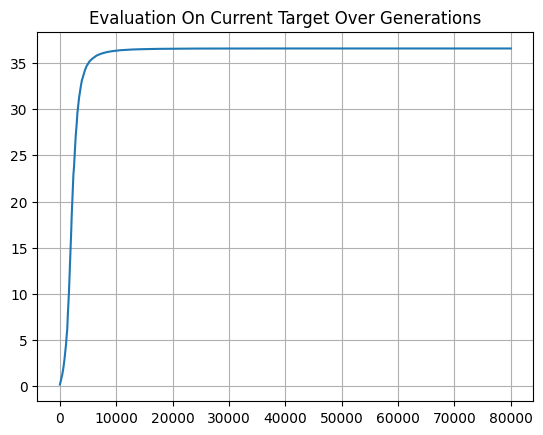

In [3]:
plt.plot(data["Generation"], data["BestEval"])
plt.title("Evaluation On Current Target Over Generations")
plt.grid()
plt.show()

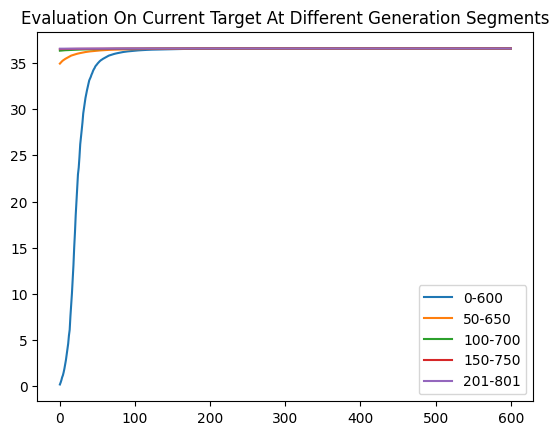

In [4]:
width = 600
graph_num = 5
graph_points = np.linspace(0, len(data["Generation"])-width, graph_num)
for start in graph_points:
    ys = data["BestEval"][int(start):int(start+width)]
    xs = np.linspace(0, len(ys), len(ys))
    plt.plot(xs, ys, label="%s-%s"%(int(start), int(start+width)))
plt.legend()
plt.title("Evaluation On Current Target At Different Generation Segments")
plt.show()

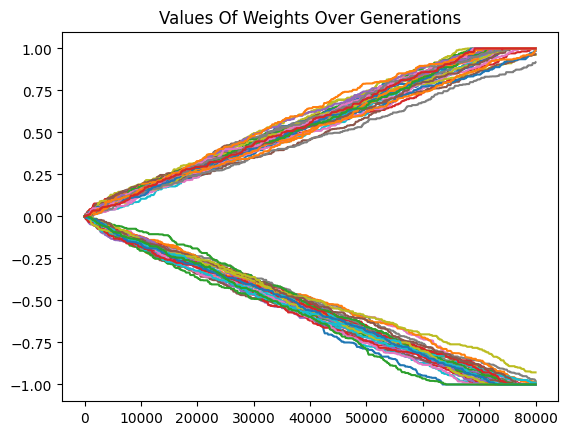

In [5]:
weights_seqs = [[] for _ in range(len(data["FlatWeights"][0]))]
for weights in data["FlatWeights"]:
    for i, w in enumerate(weights):
        weights_seqs[i].append(w)

for ws in weights_seqs:
    plt.plot(data["Generation"], ws)
plt.title("Values Of Weights Over Generations")
plt.show()

In [6]:
ddf = pd.read_csv("imgs/d.csv")
ddf["Vals"] = ddf["Vals"].apply(lambda s: [float(si) for si in s.split(":")])
ddf.head()

,Id,Timestep,Vals
0,0,0,"[-0.778074, 0.397896, 0.127856, 0.685451, -0.8..."
1,0,1,"[-1.542728, -0.601952, 1.023885, 1.47223, 0.20..."
2,0,2,"[-2.234182, -1.481562, 1.819108, 2.177784, 1.1..."
3,0,3,"[-2.787346, -2.185249, 2.455286, 2.742227, 1.9..."
4,0,4,"[-3.229877, -2.7482, 2.964229, 3.193781, 2.545..."


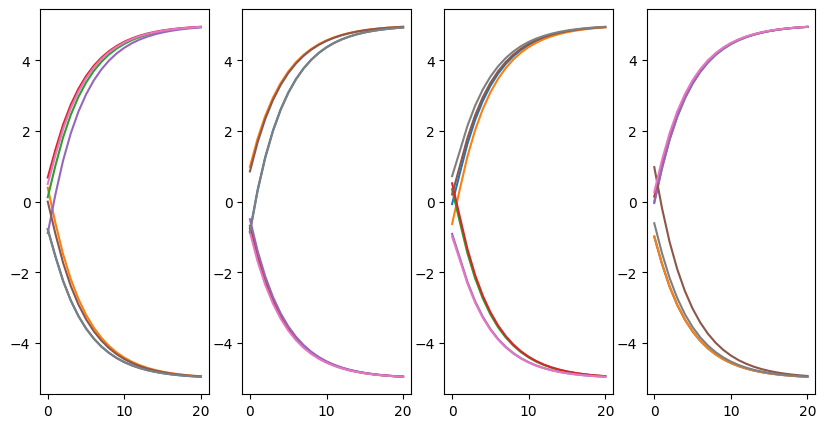

In [7]:
uids = list(ddf["Id"].unique())
fig, axs = plt.subplots(1, len(uids), figsize=(10, 5))
idi = 0
for id in uids:
    ddf_id = ddf[ddf["Id"] == id]
    num_vals = len(list(ddf_id["Vals"])[0])
    vals_seqs = [[] for _ in range(num_vals)]
    for vals in ddf_id["Vals"]:
        for i, v in enumerate(vals):
            vals_seqs[i].append(v)
    for vs in vals_seqs:
        axs[idi].plot(ddf_id["Timestep"], vs)
    idi+=1
plt.show()

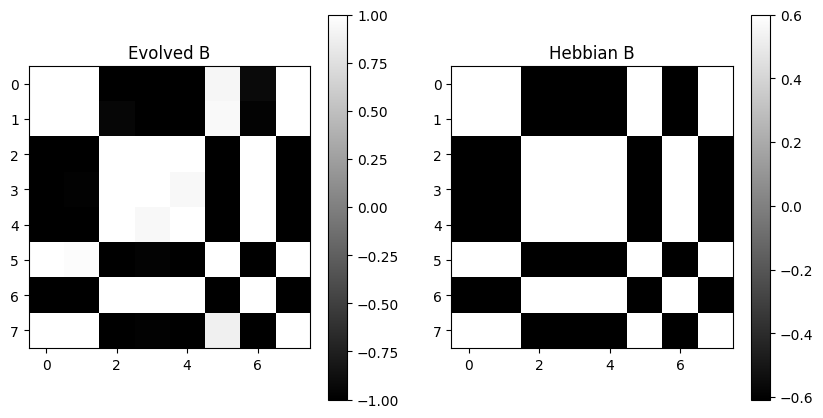

In [9]:
img_ev = np.array(Image.open("imgs/evo_weights_max1.png"))/255.0*2-1
img_hebb = np.array(Image.open("imgs/hebb_weights_max1.png"))/255.0*2-1
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
a0is = axs[0].imshow(img_ev, cmap="gray")
axs[0].set_title("Evolved B")
a1is = axs[1].imshow(img_hebb, cmap="gray")
axs[1].set_title("Hebbian B")
fig.colorbar(a0is, ax=axs[0])
fig.colorbar(a1is, ax=axs[1])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


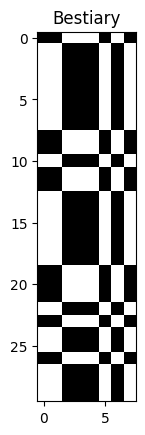

In [10]:
img_fig12e = np.array(Image.open("imgs/evo_fig12e.png"))/255.0*2-1
plt.imshow(img_fig12e, cmap="gray")
plt.title("Bestiary")
plt.show()